<a href="https://colab.research.google.com/github/bartwronski/BlogPostsExtraMaterial/blob/master/Sliced_optimal_transport_sampling_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

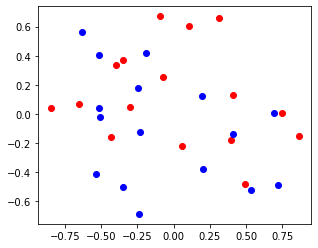

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def random_sphere_points(num_points):
  a, r = np.random.uniform(0.0, 2.0*np.pi, size=num_points), np.sqrt(np.random.uniform(0.0, 1.0, size=num_points))
  return np.vstack((r * np.sin(a), r * np.cos(a)))
r = random_sphere_points(256)

def random_project(r):
  a = np.random.uniform(0.0, np.pi)
  m = np.array([[np.sin(a), np.cos(a)],[np.cos(a), -np.sin(a)]])
  return np.dot(m, r)
r = random_sphere_points(16)
plt.axes().set_aspect(1.0)
plt.plot(r[0], r[1],'ro')
r1 = random_project(r)
plt.plot(r1[0], r1[1],'bo')


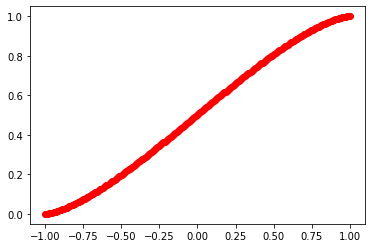

In [2]:
# Radon transform for 2D slice
x = np.linspace(-1,1,256)
pdf = np.sqrt(1-x*x)
cdf = np.cumsum(pdf)
cdf = cdf / cdf[-1]
plt.plot(x, cdf, 'ro')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


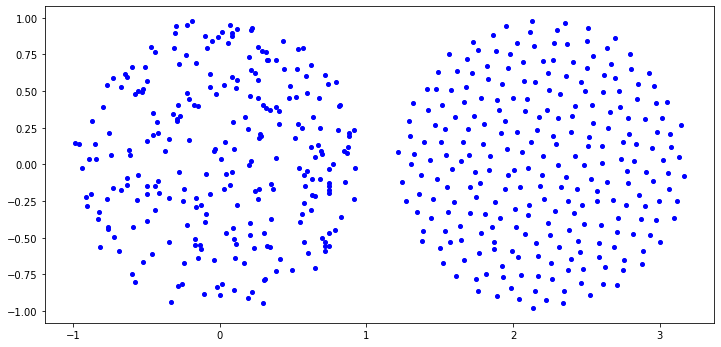

In [6]:
def uniformize_slice(p):
  # Project to CDF
  p[0] = np.interp(p[0], x, cdf)
  inds = np.argsort(p[0])
  # Uniformize
  p[0, inds] = p[0, inds] * 0.5 + 0.5 * np.linspace(0.5/len(p[0]),1-0.5/len(p[0]),len(p[0]))
  # Unproject with inverse CDF
  p[0] = np.interp(p[0], cdf, x)
  return p
# Test
ps = random_sphere_points(256)
orig_ps = ps.copy()
for _ in range(1000):
  ps = random_project(ps)
  ps = uniformize_slice(ps)
plt.rcParams['figure.figsize']=12, 12
plt.plot(np.hstack((ps[0] + 2.2, orig_ps[0])), np.hstack((ps[1], orig_ps[1])), 'bo', markersize=4)
plt.axes().set_aspect(1.0)
